In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data.csv",)
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [61]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [62]:
print(df["smoker"].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


In [63]:
print(df.groupby("smoker").mean("charges"))

              age        bmi  children       charges
smoker                                              
no      39.385338  30.651795  1.090226   8434.268298
yes     38.514599  30.708449  1.113139  32050.231832


In [64]:
print(df.corr(numeric_only=True))

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Distribution of charges')

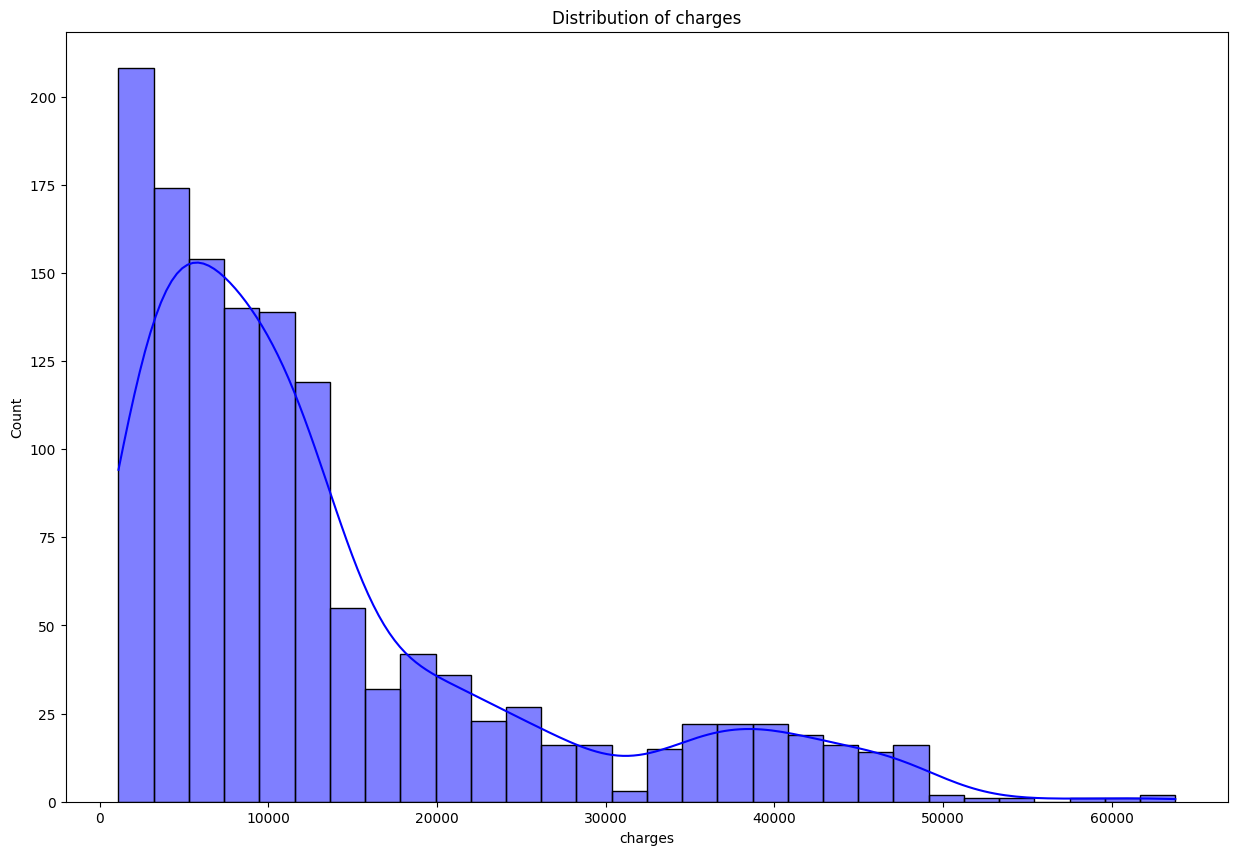

In [65]:
plt.figure(figsize=(15,10))
sns.histplot(df["charges"],kde=True,color='blue')
plt.title("Distribution of charges")

Text(0.5, 1.0, 'Age vs Charges based on smoking habit')

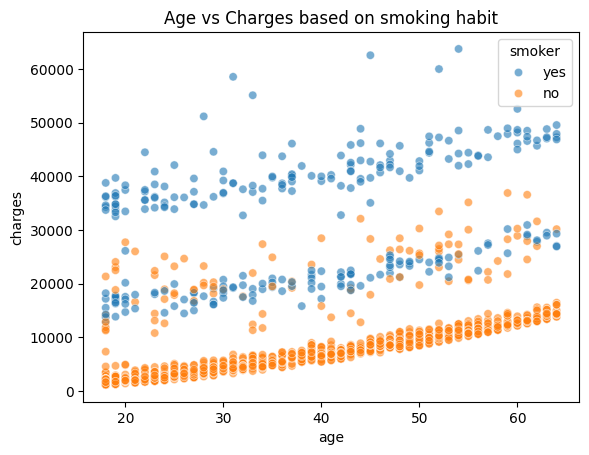

In [66]:
sns.scatterplot(x="age",y="charges",data=df,hue="smoker",alpha=0.6)
plt.title("Age vs Charges based on smoking habit")

Text(0.5, 1.0, 'bmi vs charges based on smoking habit')

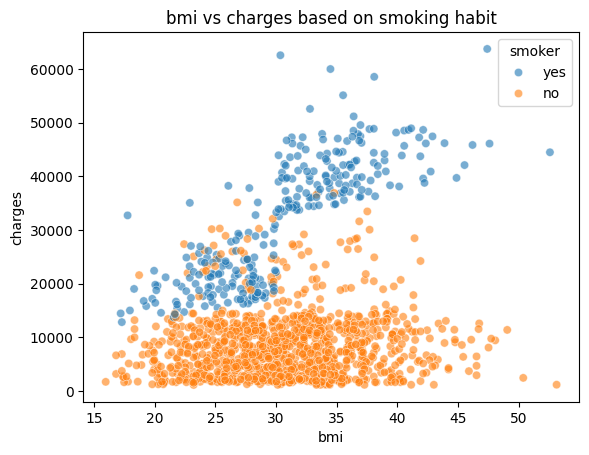

In [67]:
sns.scatterplot(data=df,x='bmi',y='charges',hue = 'smoker',alpha = 0.6)
plt.title("bmi vs charges based on smoking habit")

Text(0.5, 1.0, 'charges vs (smoker & non-smoker)')

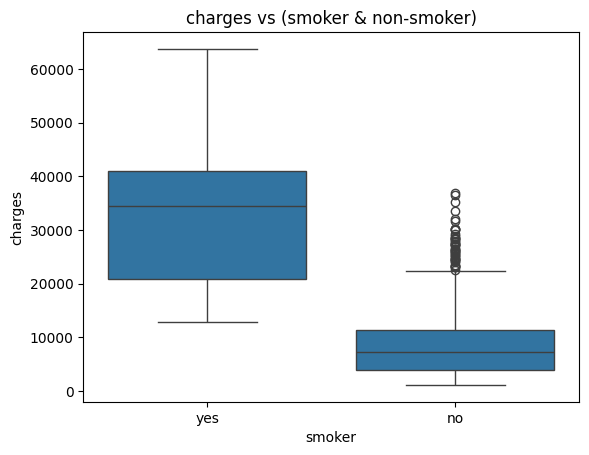

In [68]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.title("charges vs (smoker & non-smoker)")

In [69]:
df.dtypes
df['smoker'] = df['smoker'].map({'no':0,'yes':1})

In [70]:
df['sex'].unique()
df['sex'] = df['sex'].map({'male':1,'female':0})

In [71]:
df = pd.get_dummies(df,columns = ['region'],drop_first=True)
print(df.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


<Axes: xlabel='charges', ylabel='Count'>

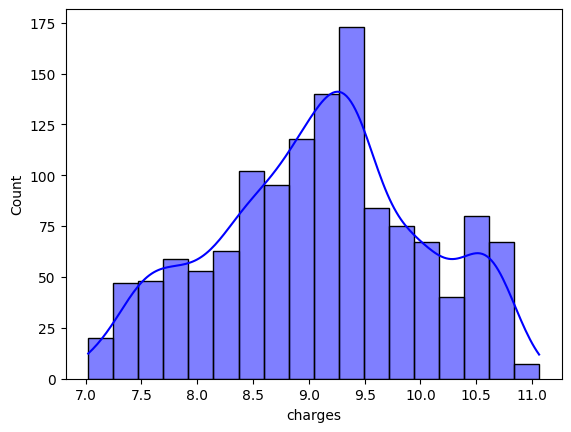

In [72]:
df['log_charges'] = np.log(df['charges'])
sns.histplot(np.log(df['charges']),kde=True,color='blue')

In [77]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3,random_state=42)
print(train.head())
print(test.head())
print(train.shape)
print(test.shape)

     age  sex     bmi  children  smoker      charges  region_northwest  \
332   61    0  31.160         0       0  13429.03540              True   
355   46    1  27.600         0       0  24603.04837             False   
138   54    0  31.900         3       0  27322.73386             False   
381   55    1  30.685         0       1  42303.69215             False   
292   25    1  45.540         2       1  42112.23560             False   

     region_southeast  region_southwest  log_charges  
332             False             False     9.505174  
355             False              True    10.110626  
138              True             False    10.215474  
381             False             False    10.652630  
292              True             False    10.648094  
      age  sex     bmi  children  smoker      charges  region_northwest  \
764    45    0  25.175         2       0   9095.06825             False   
887    36    0  30.020         0       0   5272.17580              True   


In [ ]:
print(df['smoker'].value_counts(normalize=True))

smoker
0    0.795217
1    0.204783
Name: proportion, dtype: float64


In [81]:
print(train['smoker'].mean())
print(test['smoker'].mean())

0.20833333333333334
0.19651741293532338
